<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana8/Caso%3AThe%20ALARM%20Monitory%20System/Redes_Bayesianas_alertas_m%C3%A9dicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyagrum  # permite utilizar biblioteca C++ aGrUM

In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pandas as pd

# Cargar y leer archivos de datos

1.   alarm.bif  
2.   dic_alarm.csv

In [ ]:
#Red Bayesiana
bn = gum.loadBN("alarm.bif") 


In [ ]:
# diccionario de variables
variables = pd.read_csv('dic_alarm.csv',
                        usecols = ['id','nombre','descripcion','categorias','clase'],
                        index_col = ['id'])
variables.shape

(37, 4)

# Exploración de la Red Bayesiana

In [ ]:
#¿cuántas variables y dependencias entre variables tenemos?
print(bn)

BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 752}


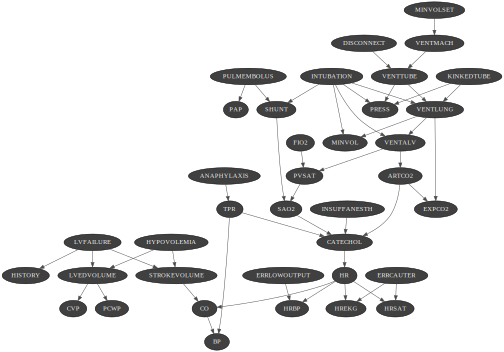

In [ ]:
gnb.showBN(bn, size="7")

In [ ]:
variables['clase'].value_counts()

Evidencia              16
Variables inferidas    13
Alarma                  8
Name: clase, dtype: int64

In [ ]:
variables[variables['clase']=='Alarma']

,nombre,descripcion,clase,categorias
id,,,,
17,HYPOVOLEMIA,hypovolemia,Alarma,"TRUE , FALSE"
18,LVFAILURE,left ventricular failure,Alarma,"TRUE , FALSE"
19,ANAPHYLAXIS,anaphylaxis,Alarma,"TRUE , FALSE"
20,INSUFFANESTH,insufficient anesthesia/analgesia,Alarma,"TRUE , FALSE"
21,PULMEMBOLUS,pulmonary embolus,Alarma,"TRUE , FALSE"
22,INTUBATION,intubation,Alarma,"NORMAL , ESOPHAGEAL , ONESIDED"
23,KINKEDTUBE,kinked tube,Alarma,"TRUE , FALSE"
24,DISCONNECT,disconnection,Alarma,"TRUE , FALSE"


In [ ]:
bn.cpt('LVFAILURE')

(gum::Potential<double>@0x32fb7c0) 
  LVFAILURE        |
TRUE     |FALSE    |
---------|---------|
 0.0500  | 0.9500  |

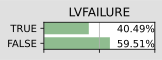

In [ ]:
gnb.showPosterior(bn,evs={"CVP": "LOW"},target='LVFAILURE')

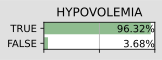

In [ ]:
gnb.showPosterior(bn,evs={"CVP": "HIGH","PCWP":"HIGH", "BP":"LOW", "CO":"LOW"},
                  target='HYPOVOLEMIA')

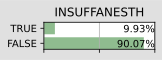

In [ ]:
gnb.showPosterior(bn,evs={"HRSAT": "LOW","PCWP":"LOW", "BP":"LOW", "SAO2":"LOW"},
                  target='INSUFFANESTH')

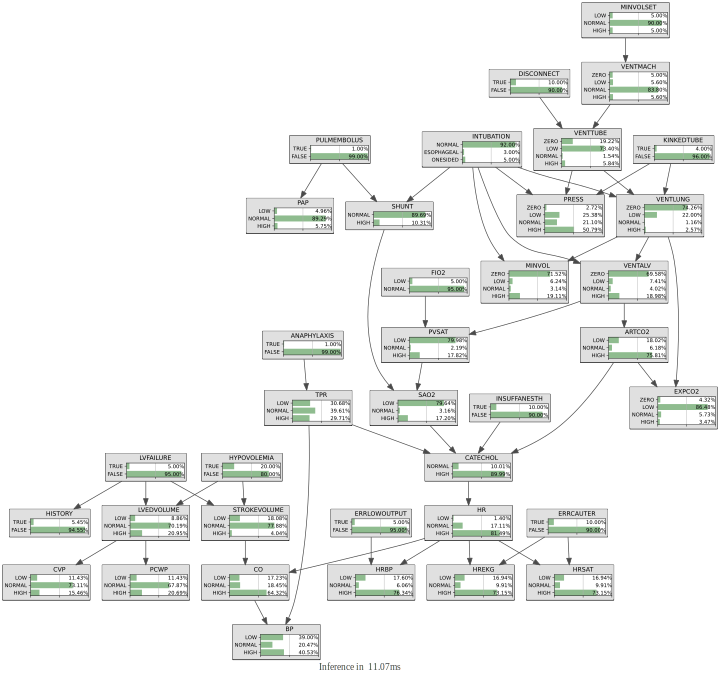

In [ ]:
gnb.showInference(bn,evs={}, size=10)

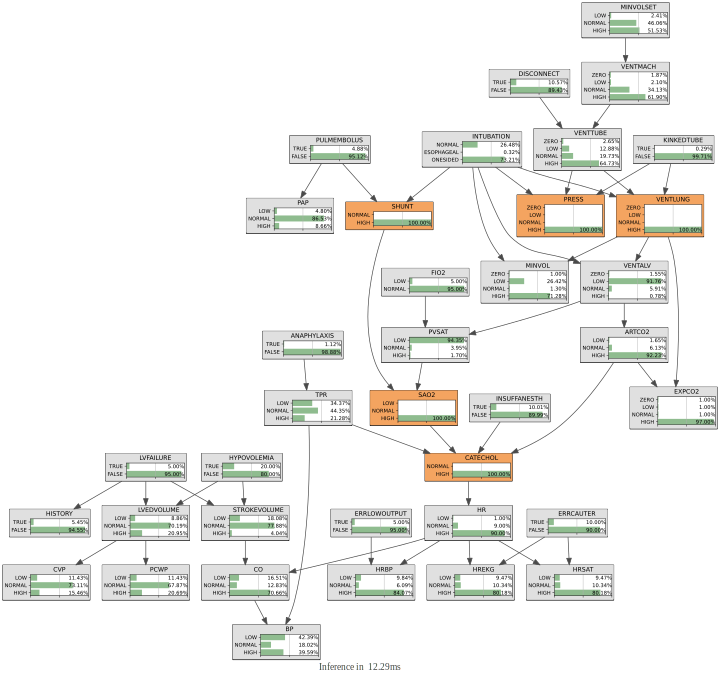

In [ ]:
gnb.showInference(bn,evs={"VENTLUNG":"HIGH", "SAO2":"HIGH",
                          "PRESS": "HIGH", "CATECHOL":"HIGH",
                          "SHUNT":"HIGH"}, size=10)